# R/Chapter 1 - Ordinary Least Squares (OLS)

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Generate-random-data" data-toc-modified-id="Generate-random-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Generate random data</a></span></li><li><span><a href="#Plot-the-empirical-relationship" data-toc-modified-id="Plot-the-empirical-relationship-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Plot the empirical relationship</a></span></li><li><span><a href="#Algebraic-OLS-estimator-in-R" data-toc-modified-id="Algebraic-OLS-estimator-in-R-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Algebraic OLS estimator in R</a></span></li><li><span><a href="#Multiplying-matrices-in-R" data-toc-modified-id="Multiplying-matrices-in-R-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Multiplying matrices in R</a></span></li><li><span><a href="#Matrix-estimator-of-OLS-in-R" data-toc-modified-id="Matrix-estimator-of-OLS-in-R-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Matrix estimator of OLS in R</a></span></li><li><span><a href="#Estimating-least-squares-in-R" data-toc-modified-id="Estimating-least-squares-in-R-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Estimating least squares in R</a></span></li><li><span><a href="#The-lm()-function" data-toc-modified-id="The-lm()-function-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>The <code>lm()</code> function</a></span></li><li><span><a href="#Measuring-uncertainty---data-simulations" data-toc-modified-id="Measuring-uncertainty---data-simulations-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Measuring uncertainty - data simulations</a></span></li><li><span><a href="#Bootstrap" data-toc-modified-id="Bootstrap-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Bootstrap</a></span></li><li><span><a href="#NLSM-data" data-toc-modified-id="NLSM-data-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>NLSM data</a></span></li><li><span><a href="#Returns-to-schooling" data-toc-modified-id="Returns-to-schooling-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Returns to schooling</a></span></li></ul></div>

## Generate random data

In [30]:
set.seed(123456789)
N <- 100 # number of observations
a <- 2 # model parameter 1 of interest
b <- 3 # model parameter 2 of interest
# create a vector where the observed characteristic, x, 
# is drawn from a uniform distribution
x <- runif(N) 
# create a vector where the unobserved characteristic, u, 
# is drawn from a standard normal distribution
u <- rnorm(N)
y <- a + b*x + u # create vector y

## Plot the empirical relationship

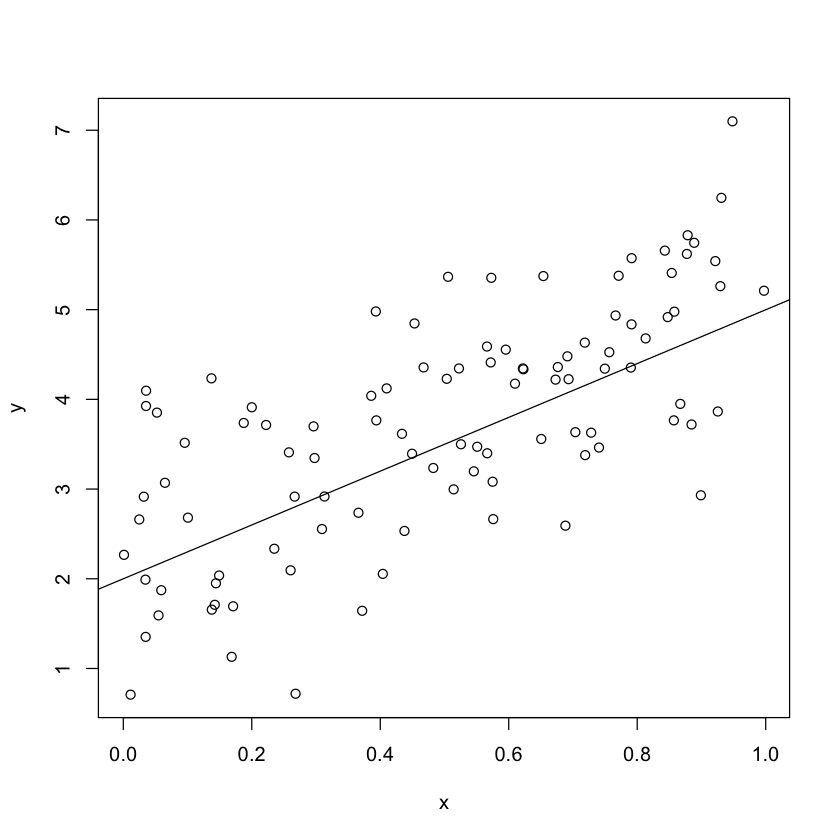

In [31]:
plot(x,y) # creates a simple plot
abline(a=2, b = 3) # adds a linear function to the plot

In [32]:
# means takes an average
# the logical expression inside the square brackets
# creates an index for the elements of y where the logical
# expression in x holds

mean(y[x>0.95])-mean(y[x<0.05])

[1] 2.721387

## Algebraic OLS estimator in R

In [33]:
b_hat <- (mean(y)-2)/mean(x)
b_hat

[1] 3.459925

## Multiplying matrices in R

In [34]:
x1 <- x[1:5] # only includes elements 1 to 5
X1 <- cbind(1,x1) # create a matrix

# predicts values of y using the model
X1 %*% c(2,3)

4.079527
4.018643
3.961705
4.156967
4.764634


In [36]:
# compare to the true values
y[1:5]

[1] 4.224902 4.219999 5.374130 3.378327 5.541021

## Matrix estimator of OLS in R

In [37]:
# the matrix of explanatory variables includes a first column of 1's
# which accounts for the intercept term 
X <- cbind(1,x) 

In [38]:
# In R the matrix inverse can be found using the solve() function
# and t(X) %*% X is the transpose of X multiplied by X
solve(t(X)%*%X)

,,x
,0.03916481,-0.05883708
x,-0.05883708,0.11869792


In [39]:
# solving the matrix algebra in Equation (1.14)
beta_hat <- solve( t(X) %*% X) %*% t(X) %*% y
beta_hat

,2.181997
x,3.092764


In [40]:
# over the unobserved term
u_hat <- solve( t(X) %*% X) %*% t(X) %*% u
u_hat

,0.1819969
x,0.0927640


## Estimating least squares in R

In [41]:
# searching for the value that minimizes the sum of the squared differences
# we search the solution in the interval [-10,10]
optimize(function(b)sum((y-2-b*x)^2), c(-10,10))
         
# alternatively, using the first order condition
(mean(x*y)-2*mean(x))/mean(x*x)

$minimum
[1] 3.366177

$objective
[1] 84.16733

[1] 3.366177

## The `lm()` function

In [42]:
data1 <- as.data.frame(cbind(y,x))
lm1 <- lm(y~x)

In [43]:
length(lm1)
names(lm1)

[1] 12

[1] "coefficients"  "residuals"     "effects"       "rank"         
 [5] "fitted.values" "assign"        "qr"            "df.residual"  
 [9] "xlevels"       "call"          "terms"         "model"

In [44]:
# have a look at the coefficients
lm1$coefficients

(Intercept)           x 
   2.181997    3.092764

In [45]:
# and we compare with the results from the matrix algebra
# no real computational differences in R between an 'algebra'
# approach and a 'least squares' approach.
t(beta_hat)

,x
2.181997,3.092764


## Measuring uncertainty - data simulations

In [46]:
set.seed(123456789)
K <- 1000

# create a 1000*2 matrix filled with 0s (faster computation afterwards)
sim_res <- matrix(NA, K,2)

for (k in 1:K){
    x <- runif(N)
    u <- rnorm(N)
    y <- a + b*x + u
    sim_res[K,] <- lm(y~x)$coefficients
}
# name the columns of the result matrix
colnames(sim_res) <- c('Est. of a', 'Est. of b')

In [47]:
install.packages('xtable')
require(xtable)
sum_tab <- summary(sim_res)
rownames(sum_tab) <- NULL # no row names
xtable(sum_tab)


The downloaded binary packages are in
	/var/folders/c7/3l5n1fm57mqdpwbmyfnbrq400000gn/T//RtmpgDfn6w/downloaded_packages


Est. of a,Est. of b
<chr>,<chr>
Min. :1.8,Min. :3.41
1st Qu.:1.8,1st Qu.:3.41
Median :1.8,Median :3.41
Mean :1.8,Mean :3.41
3rd Qu.:1.8,3rd Qu.:3.41
Max. :1.8,Max. :3.41
NA's :999,NA's :999


## Bootstrap

In [48]:
set.seed(123456789)
K <- 1000
bs_mat <- matrix(NA, K, 2)

for (k in 1:K){
    index_k <- round(runif(N, min = 1, max = N))
    # creates a pseudo-random sample.
    # draws N elements uniformaly betwee 1 and N
    # rounds all the elements to the nearest integer
    data_k <- data1[index_k,]
    # we run the regression on each pseudo-sample
    bs_mat[k,] <- lm(y~x, data = data_k)$coefficients
}

In [49]:
tab_res <- matrix(NA, 2, 4)
tab_res[,1] <- colMeans(bs_mat)
# calculates the means for each column of the matrix
# inputs the first column of the result matrix
tab_res[,2] <- apply(bs_mat, 2, sd)
# a method to have the function sd() to act on each
# column of the matrix. Dimension 2 is the column
# sd() calculates the standard deviation
tab_res[,3] <- quantile(bs_mat[,1], c(0.025, 0.975))
# calculates quantiles of the columns at 2.5% and 97.5%
tab_res[,4] <- quantile(bs_mat[,2], c(0.025, 0.975))
colnames(tab_res) <- c("Mean", "SD", "2.5%", "97.5%")
rownames(tab_res) <- c("Est.of a","Est.of b")

# Bootstrapped estimates from the simulation
tab_res

,Mean,SD,2.5%,97.5%
Est.of a,2.205848,0.2117883,1.786446,2.353342
Est.of b,3.064233,0.3594629,2.650740,3.741051


In [50]:
# standard errors (not boostrapped)
xtable(summary(lm1))

,Estimate,Std. Error,t value,Pr(>|t|)
,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),2.181997,0.1824794,11.957499,7.387431e-21
x,3.092764,0.3176781,9.735527,4.539373e-16


## NLSM data

In [51]:
x <- read.csv("../data/nls.csv", as.is = TRUE)
# convention to name any dataset as x

x$wage76 <- as.numeric(x$wage76)
x$lwage76 <- as.numeric(x$lwage76)

x1 <- x[is.na(x$lwage76)==0,]
# creates a new dataset with missing values removed

Warning message in eval(expr, envir, enclos):
“NAs introducidos por coerción”
Warning message in eval(expr, envir, enclos):
“NAs introducidos por coerción”


## Returns to schooling

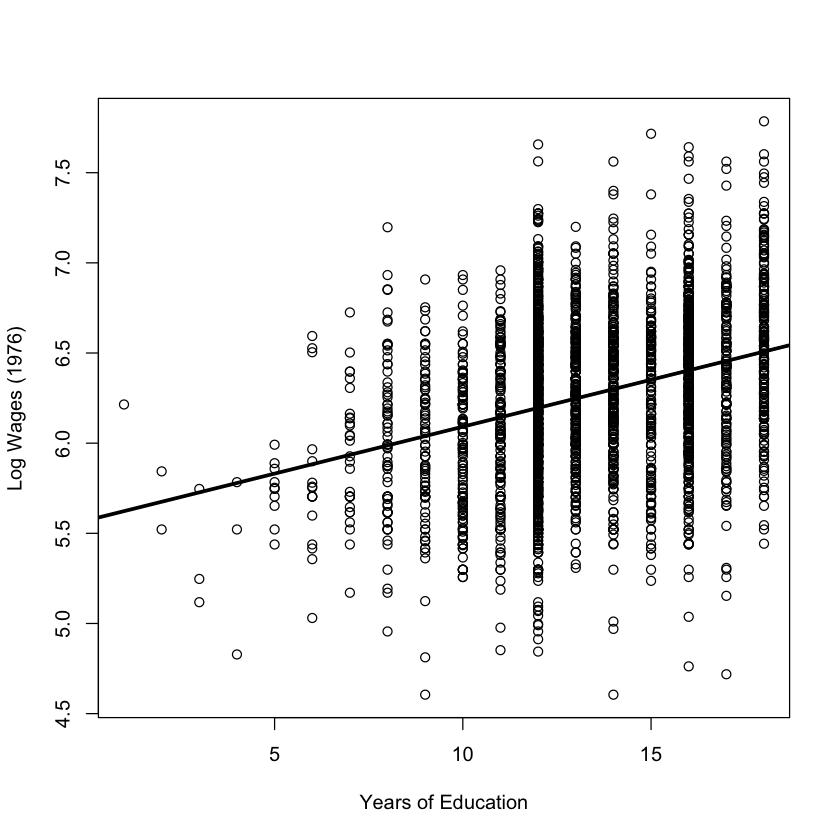

In [52]:
lm1 <- lm(lwage76~ed76, data = x1)
plot(x1$ed76, x1$lwage76, xlab='Years of Education', ylab = 'Log Wages (1976)')
abline(a = lm1$coefficients[1], b = lm1$coefficients[2], lwd = 3)

In [53]:
xtable(summary(lm1), floating = FALSE)

,Estimate,Std. Error,t value,Pr(>|t|)
,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),5.57088235,0.038829466,143.47049,0.00000e+00
ed76,0.05209424,0.002869708,18.15315,5.77145e-70


In [54]:
exp(log(mean(x1$wage76))+lm1$coef[2])/mean(x1$wage76)

ed76 
1.053475